<h1>Data distribution</h1>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_file = "Dataset-Unicauca-Version2-87Atts.csv"
header_file = "ori_header.csv"

names = None
with open(header_file, 'r') as f:
    for l in f:
        names = l.strip('\n').split(',')
    names = names
train_data = pd.read_csv(train_file, names=names, low_memory=False)

In [3]:
train_data = train_data.iloc[1:]
train_data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
1,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0,0,0,0,0,0,0,BENIGN,131,HTTP_PROXY
2,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0,0,0,0,0,0,0,BENIGN,131,HTTP_PROXY
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0,0,0,0,0,0,0,BENIGN,7,HTTP
4,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0,0,0,0,0,0,0,BENIGN,7,HTTP
5,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0,0,0,0,0,0,0,BENIGN,131,HTTP_PROXY


<BarContainer object of 78 artists>

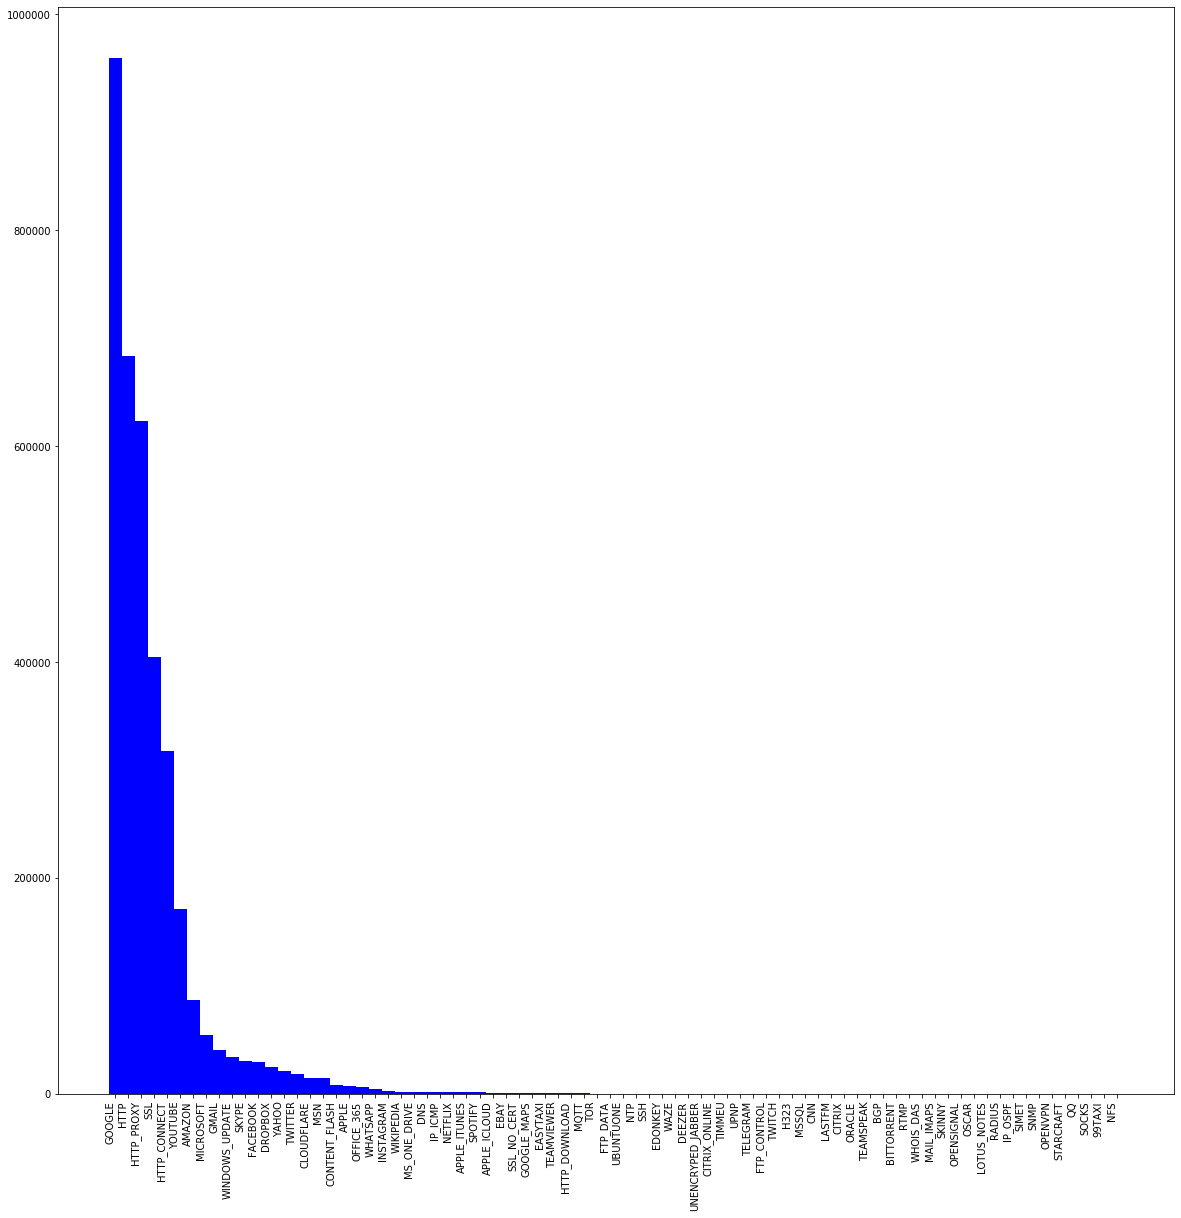

In [4]:
protocol_name = dict(train_data['ProtocolName'].value_counts())
plt.figure(figsize=(20,20))
plt.xticks(rotation=90, ha='right')
plt.bar(protocol_name.keys(), protocol_name.values(), width=1.0, color='b')

In [5]:
train_data['ProtocolName'].value_counts()

GOOGLE          959110
HTTP            683734
HTTP_PROXY      623210
SSL             404883
HTTP_CONNECT    317526
                 ...  
STARCRAFT            3
QQ                   2
SOCKS                1
99TAXI               1
NFS                  1
Name: ProtocolName, Length: 78, dtype: int64

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'
train_data['Label'] = train_data['Label'].astype('category')
train_data['Source.IP'] = train_data['Source.IP'].astype('category')
train_data['Destination.IP'] = train_data['Destination.IP'].astype('category')
train_data['ProtocolName'] = train_data['ProtocolName'].astype('category')
cat_columns = train_data.select_dtypes(['category']).columns
train_data[cat_columns] = train_data[cat_columns].apply(lambda x: x.cat.codes)

In [7]:
pd.options.mode.chained_assignment = None  # default='warn'
train_data.drop(['Timestamp'], axis=1, inplace=True)
train_data.drop(['Flow.ID'], axis=1, inplace=True)
train_data.drop(['Source.IP'], axis=1, inplace=True)
train_data.drop(['L7Protocol'], axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import Normalizer

In [9]:
norm = Normalizer(norm='l2')
train_label = train_data.values[:, -1]

In [10]:
names.remove("Flow.ID")
names.remove("Timestamp")
names.remove("Source.IP")
names.remove("L7Protocol")

In [11]:
normalized_data = norm.fit_transform(train_data.values[:, :-1])
train_data_norm = pd.DataFrame(data=normalized_data, columns=names[:-1])

In [12]:
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'PCA')

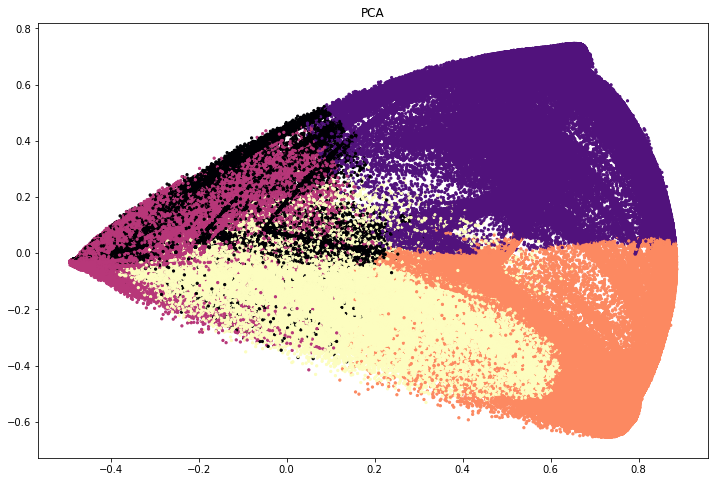

In [13]:
kmeans = KMeans(n_clusters=5, random_state=10).fit(train_data_norm)
pca = PCA(n_components=2)
res = pca.fit_transform(train_data_norm)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=5, cmap='magma')
plt.title('PCA')

<h1>Pick 5 type</h1>

DNS<br>
IP_ICMP<br>
SSL_NO_CRET<br>
FTP_DATA<br>
SSH<br>

For student, they only know attributes.

<h1>Preprocessing</h1>

In [14]:
train_file = "new_train_data.csv"
header_file = "header.csv"

names = None
with open(header_file, 'r') as f:
    for l in f:
        names = l.strip('\n').split(',')
    
train_data = pd.read_csv(train_file, names=names, low_memory=False)

In [15]:
train_data = train_data.iloc[1:]
train_data.head()

,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
1,1651.0,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,...,0,0,0,0,0,0,0,BENIGN,64,SSL_NO_CERT
2,6460.0,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,...,0,0,0,0,0,0,0,BENIGN,64,SSL_NO_CERT
3,6578.0,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,...,0,0,0,0,0,0,0,BENIGN,64,SSL_NO_CERT
4,7219.0,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,...,0,0,0,0,0,0,0,BENIGN,64,SSL_NO_CERT
5,7683.0,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,...,0,0,0,0,0,0,0,BENIGN,64,SSL_NO_CERT


<BarContainer object of 5 artists>

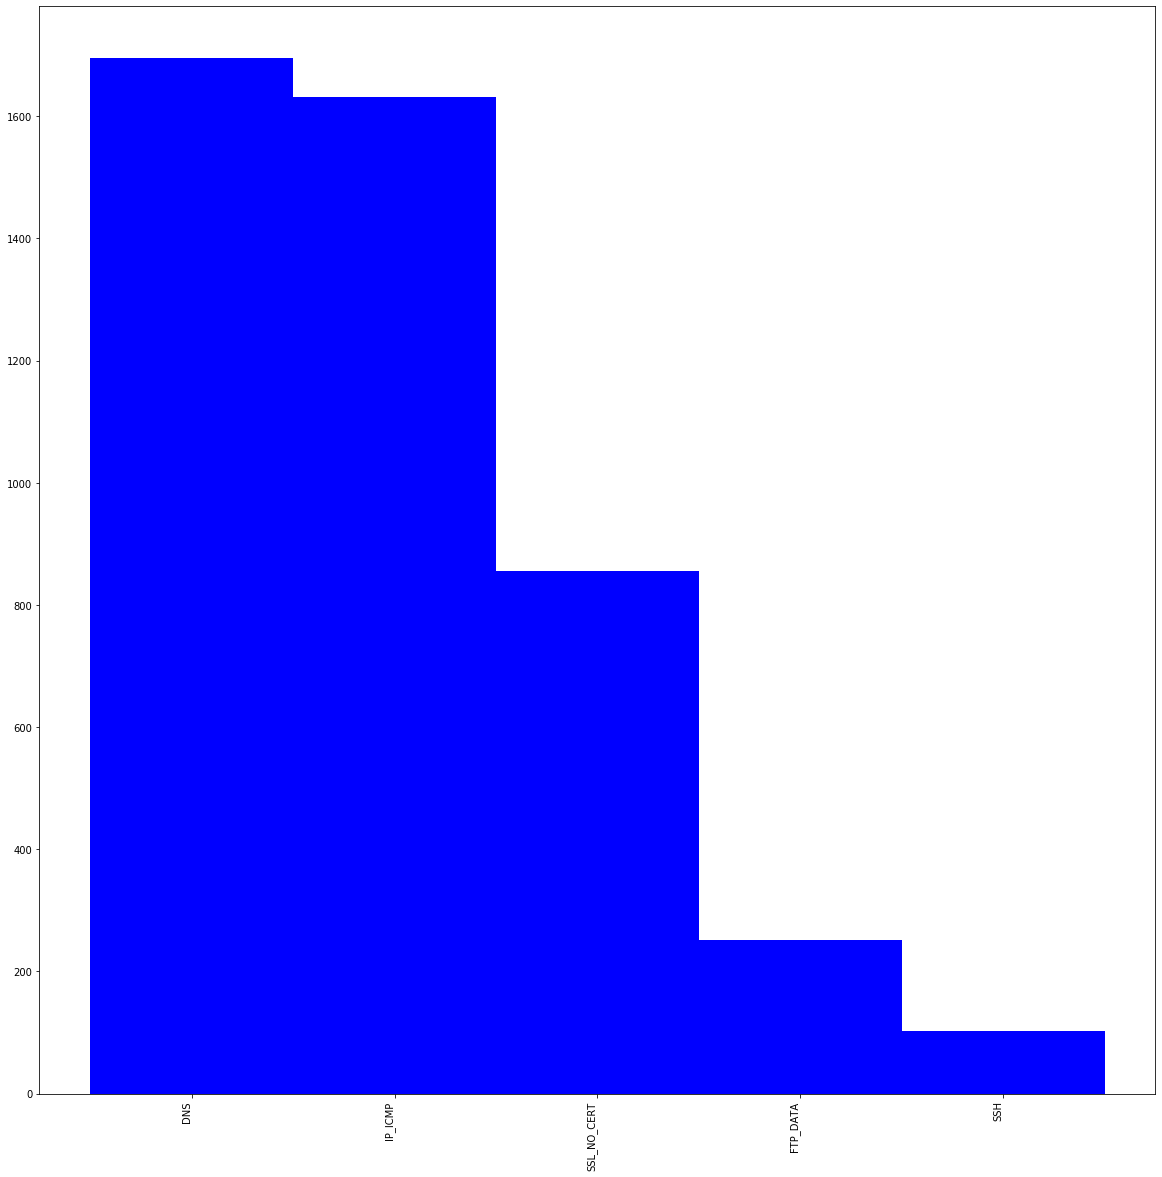

In [16]:
protocol_name = dict(train_data['ProtocolName'].value_counts())
plt.figure(figsize=(20,20))
plt.xticks(rotation=90, ha='right')
plt.bar(protocol_name.keys(), protocol_name.values(), width=1.0, color='b')

In [17]:
train_data['ProtocolName'].value_counts()

DNS            1695
IP_ICMP        1631
SSL_NO_CERT     856
FTP_DATA        251
SSH             102
Name: ProtocolName, dtype: int64

In [18]:
train_data.shape

(4535, 88)

In [19]:
train_data.drop_duplicates(subset=None, keep='first', inplace=True)

In [20]:
train_data.shape

(4535, 88)

In [21]:
pd.options.mode.chained_assignment = None  # default='warn'
train_data['Label'] = train_data['Label'].astype('category')
train_data['Source.IP'] = train_data['Source.IP'].astype('category')
train_data['Destination.IP'] = train_data['Destination.IP'].astype('category')
train_data['ProtocolName'] = train_data['ProtocolName'].astype('category')
cat_columns = train_data.select_dtypes(['category']).columns
train_data[cat_columns] = train_data[cat_columns].apply(lambda x: x.cat.codes)

In [22]:
pd.options.mode.chained_assignment = None  # default='warn'
train_data.drop(['Timestamp'], axis=1, inplace=True)
train_data.drop(['Flow.ID'], axis=1, inplace=True)
train_data.drop(['Source.IP'], axis=1, inplace=True)
train_data.drop(['L7Protocol'], axis=1, inplace=True)

<h1>Normalization</h1>

In [23]:
from sklearn.preprocessing import Normalizer
norm = Normalizer(norm='l2')

In [24]:
train_label = train_data.values[:, -1]

In [25]:
names.remove("Flow.ID")
names.remove("Timestamp")
names.remove("Source.IP")
names.remove("L7Protocol")

In [26]:
normalized_data = norm.fit_transform(train_data.values[:, :-1])
train_data_norm = pd.DataFrame(data=normalized_data, columns=names[:-1])

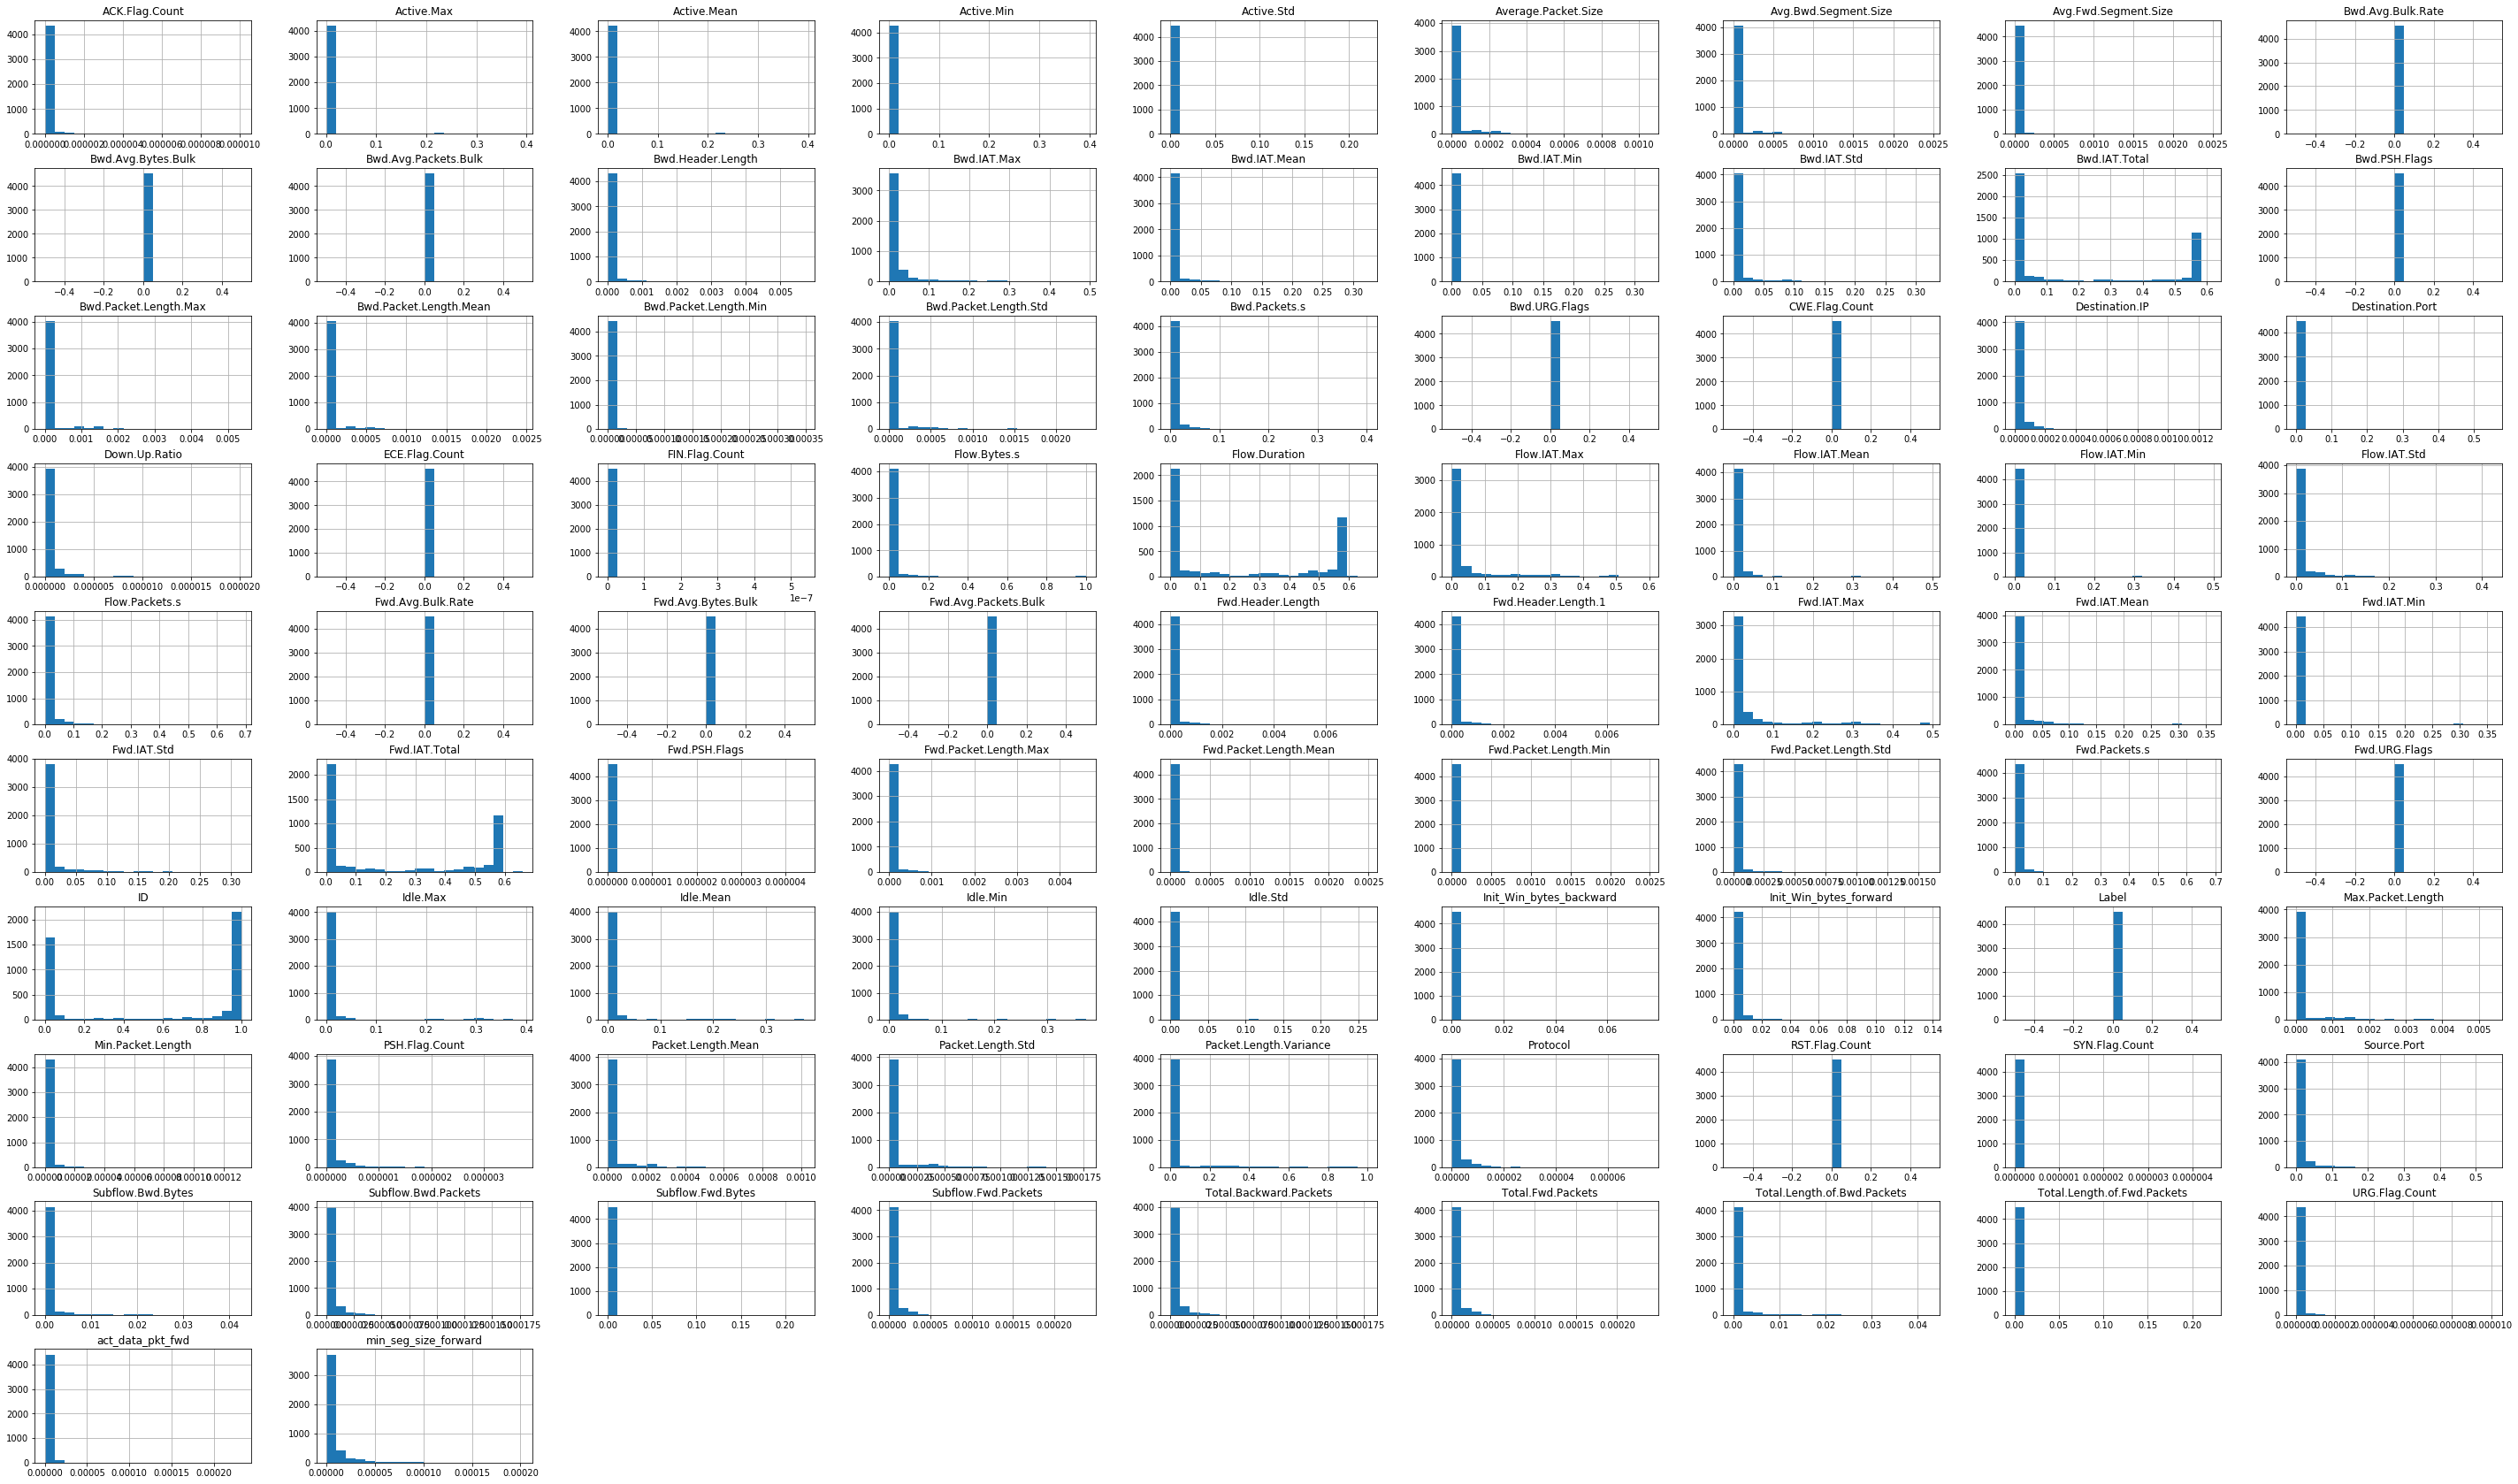

In [27]:
train_data_norm.hist(figsize=(50, 30), bins=20)
plt.show()

<h1>Cluster</h1>

In [28]:
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering
from sklearn.decomposition import PCA

In [29]:
kmeans = KMeans(n_clusters=5, random_state=10).fit(train_data_norm)

Text(0.5, 1.0, 'PCA kmeans')

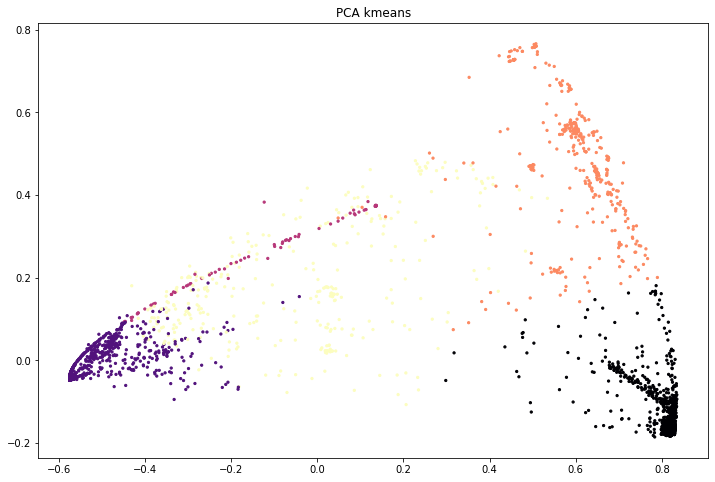

In [30]:
pca = PCA(n_components=2)
res = pca.fit_transform(train_data_norm)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=5, cmap='magma')
plt.title('PCA kmeans')

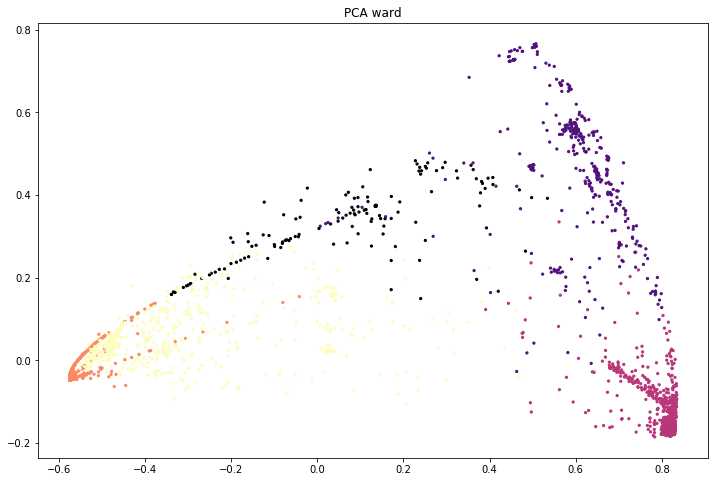

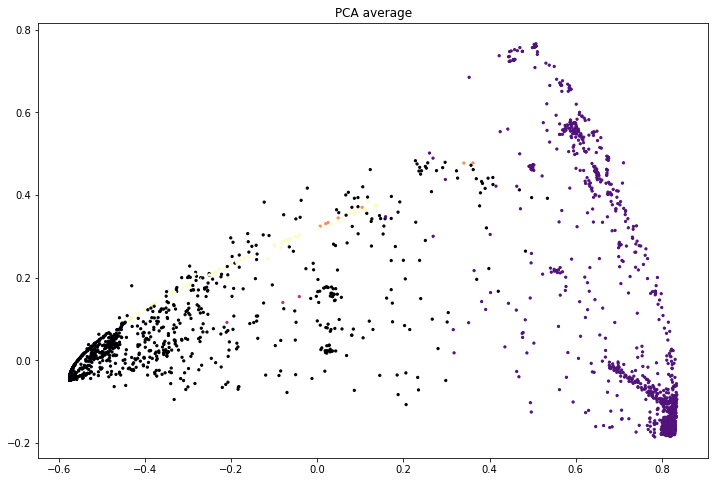

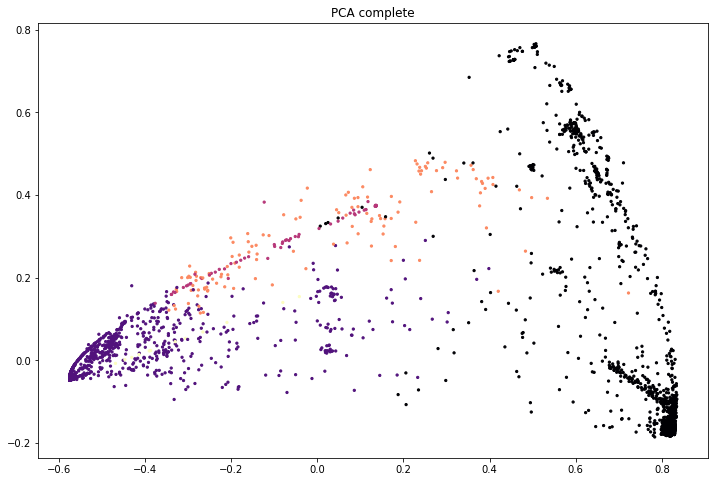

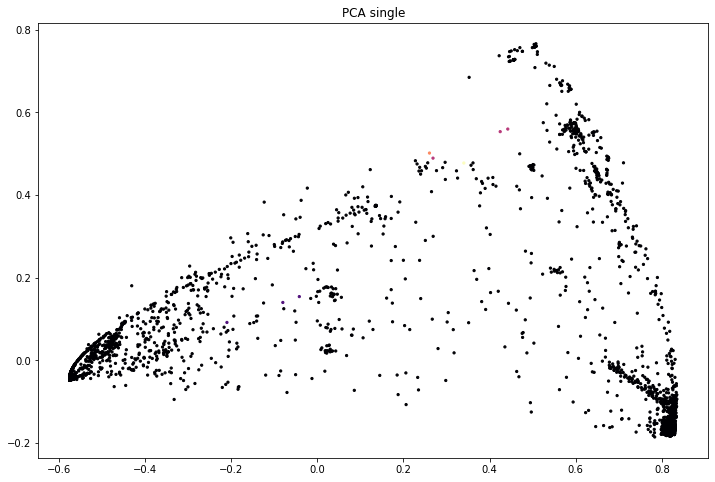

In [31]:
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=5).fit(train_data_norm)
    plt.figure(figsize=(12,8))
    plt.scatter(res[:,0], res[:,1], c=clustering.labels_, s=5, cmap='magma')
    plt.title('PCA ' + linkage)

Text(0.5, 1.0, 'Birch')

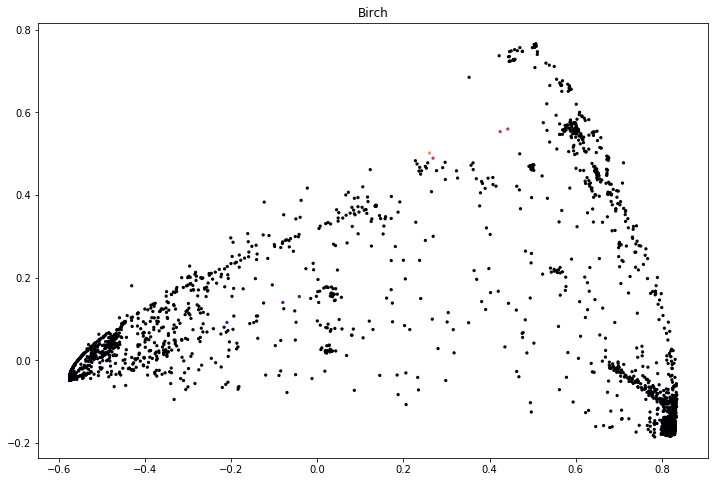

In [32]:
brc = Birch(n_clusters=5)
brc.fit(train_data_norm)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=clustering.labels_, s=5, cmap='magma')
plt.title('Birch')

<h1>PCA with ground truth</h1>

Text(0.5, 1.0, 'PCA with label')

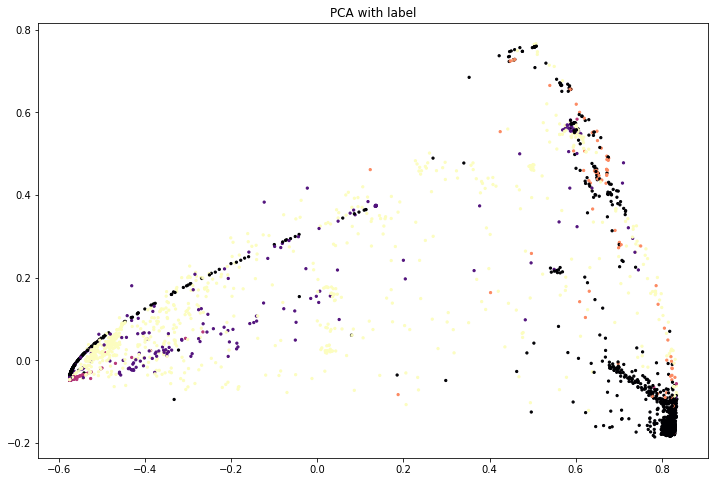

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=train_label, s=5, cmap='magma')
plt.title('PCA with label')

<h1>Human pick features</h1>

In [34]:
new_data = train_data[['Source.Port','Destination.Port']]

Text(0.5, 1.0, 'PCA kmeans')

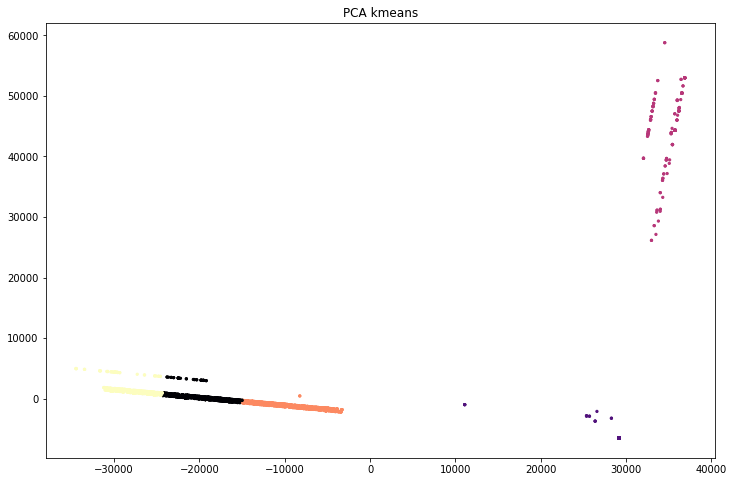

In [35]:
kmeans = KMeans(n_clusters=5, random_state=10).fit(new_data)
pca = PCA(n_components=2)
res = pca.fit_transform(new_data)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=5, cmap='magma')
plt.title('PCA kmeans')

Text(0.5, 1.0, 'PCA with label')

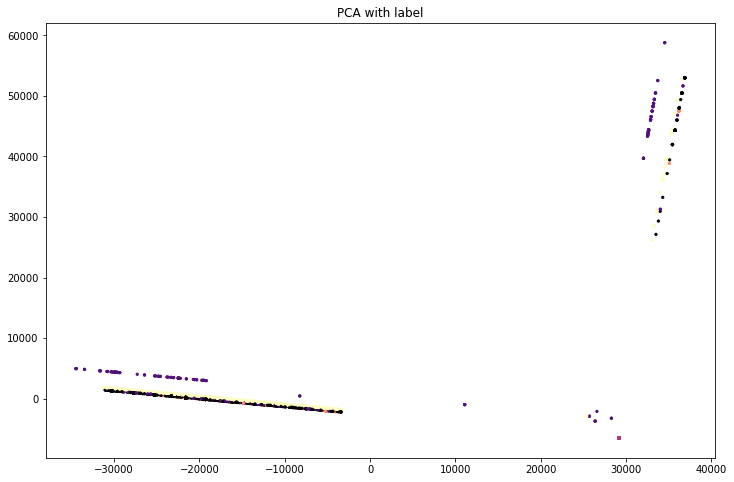

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=train_label, s=5, cmap='magma')
plt.title('PCA with label')